In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Conferences.SIGIR.CMN_our_interface.Pinterest.PinterestICCVReader import PinterestICCVReader

In [2]:
def get_popularity(matrix):
    return matrix.A.sum(axis=0)


def get_percentile(popularity_array, k):
    # print('Luciano > popularity_array:', popularity_array)
    sorted_popularity_array = np.sort(popularity_array)
    index = int(round(popularity_array.shape[0] * k / 100))
    # print('Luciano > len:', popularity_array.shape[0])
    # print('Luciano > index:', index)
    percentile = sorted_popularity_array[index]
    # print('Luciano > percentile:', percentile)
    return percentile

In [31]:
dataset = PinterestICCVReader()
URM_train = dataset.URM_train.copy()
popularity = get_popularity(URM_train)
popularity /= max(popularity)
popularity = np.sort(popularity)

df = pd.DataFrame(data=popularity, columns=['pop'])
grs = df.groupby('pop')

matrix = np.zeros((len(grs), 2))

i = 0

for gr in grs:
    matrix[i, 0] = gr[0]
    matrix[i, 1] = gr[1].count()
    i += 1



PinterestICCVReader: Attempting to load pre-splitted data
Loaded: URM_train_original
Loaded: URM_train
Loaded: URM_test
Loaded: URM_test_negative
Loaded: URM_validation


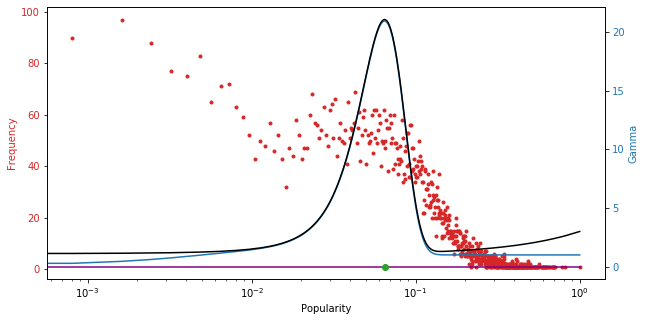

In [209]:
alpha_1, alpha_2, beta, scale, pi = 200, 2, 0.02, 1, np.pi
# alpha, beta, scale, pi = 200, 0.02, 1, np.pi
# alpha, beta, scale, pi = 100, 0.03, 1/20, np.pi
percentile = get_percentile(popularity, 45)

f = 1 / (beta * np.sqrt(2 * pi))

gamma_1 = np.tanh(alpha_1 * popularity) + scale * f * np.exp(-1 / (2 * (beta ** 2)) * (popularity - percentile)**2)
gamma_2 = alpha_2 * popularity + scale * f * np.exp(-1 / (2 * (beta ** 2)) * (popularity - percentile)**2) + 1

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Frequency', color=color)
ax1.plot(matrix[:, 0], matrix[:, 1], '.', color=color)
ax1.plot([0, 1], [1, 1], color='purple')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Gamma', color=color)  # we already handled the x-label with ax1
ax2.plot(popularity, gamma_1, color=color)
ax2.plot(popularity, gamma_2, color='black')
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax2.plot(percentile, 0, 'o', color=color)

plt.xscale("log")
plt.show()

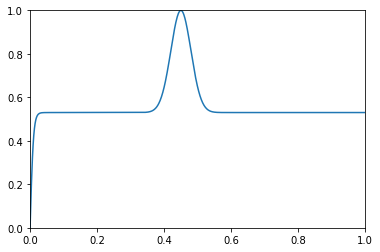

In [210]:
a = np.linspace(0, 1, 1000)

alpha, beta, scale, pi = 100, 0.03, 1/15, np.pi
percentile = get_percentile(a, 45)

f = 1 / (beta * np.sqrt(2 * pi))

y_a = np.tanh(alpha * a) + scale * f * np.exp(-1 / (2 * (beta ** 2)) * (a - percentile)**2)
y_a = y_a/max(y_a)

plt.figure()
plt.plot(a, y_a)
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()

In [211]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

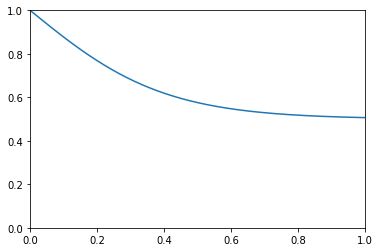

In [212]:
b = np.linspace(0, 1, 1000)

gamma = 5

y_b = sigmoid(-(b) * gamma) + 0.5

plt.figure()
plt.plot(b, y_b)
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()

In [213]:
from mpl_toolkits import mplot3d


X, Y = np.meshgrid(y_a, y_b)
Z = (X * Y)

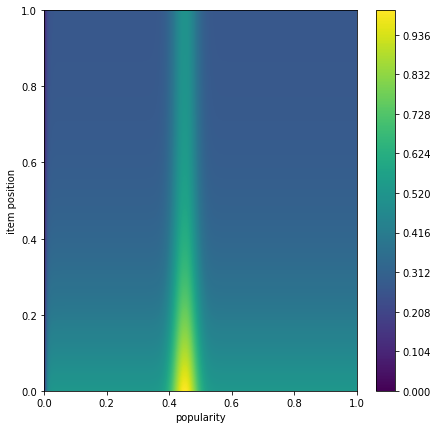

In [214]:
fig = plt.figure(figsize=(7, 7))
# ax = plt.axes(projection='3d')
cp = plt.contourf(a, b, Z, 256) #, 50) cmap='binary')
fig.colorbar(cp)
plt.xlabel('popularity')
plt.ylabel('item position')
# plt.set_xlabel('x')
# plt.set_ylabel('y')
# pltset_zlabel('z')
# ax.view_init(20, 100)
plt.show()